## Dakshay Ahuja - 2010990178

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_train = pd.read_excel("Dataset/Flight Price Dataset/Flight_Price_Train.xlsx")
df_test = pd.read_excel("Dataset/Flight Price Dataset/Flight_Price_Test.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train.duplicated().sum()

220

In [7]:
null_values = df_train.isnull().sum()
null_values[null_values>0]

Route          1
Total_Stops    1
dtype: int64

In [8]:
df_train = df_train.dropna()

In [9]:
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['date'] = df_train['Date_of_Journey'].dt.day
df_train['month'] = df_train['Date_of_Journey'].dt.month
df_train['year'] = df_train['Date_of_Journey'].dt.year
df_train['Dep_hour'] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Dep_minutes'] = pd.to_datetime(df_train.Dep_Time).dt.minute
df_train['Arrival_hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_minutes'] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(['Arrival_Time', 'Dep_Time', 'Date_of_Journey'], axis=1, inplace=True)

In [10]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [11]:
duration = list(df_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())  !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

df_train['Duration_hours'] = duration_hours
df_train['Duration_mins'] = duration_mins
df_train.drop('Duration', axis=1, inplace=True)

In [12]:
df_train.drop('Route', axis=1, inplace=True)
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


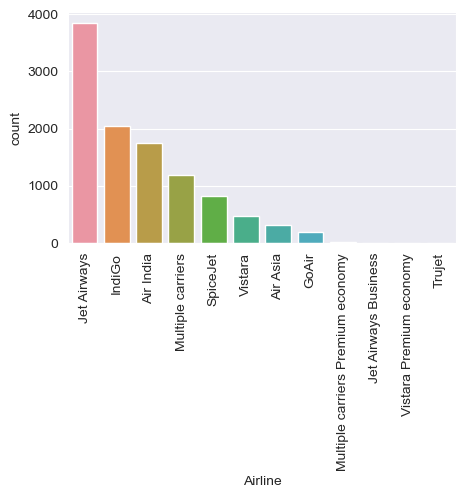

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_train, x='Airline', order = df_train['Airline'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Jet Airways is the most Preferred Airline

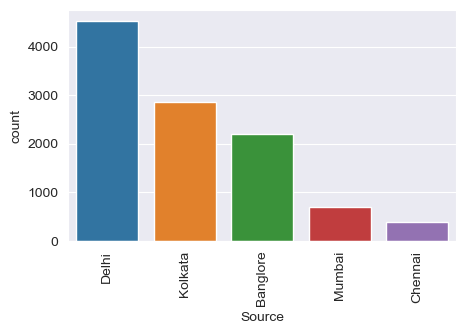

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_train, x='Source', order = df_train['Source'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Majority of the flights take off from Delhi

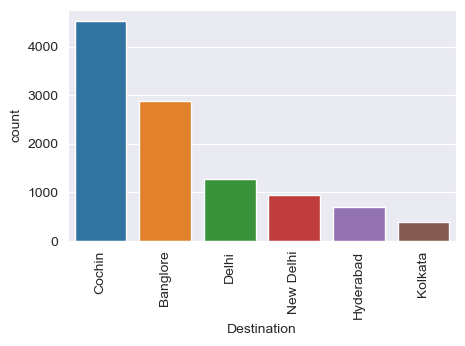

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_train, x='Destination', order = df_train['Destination'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Maximum flights landed in cochin

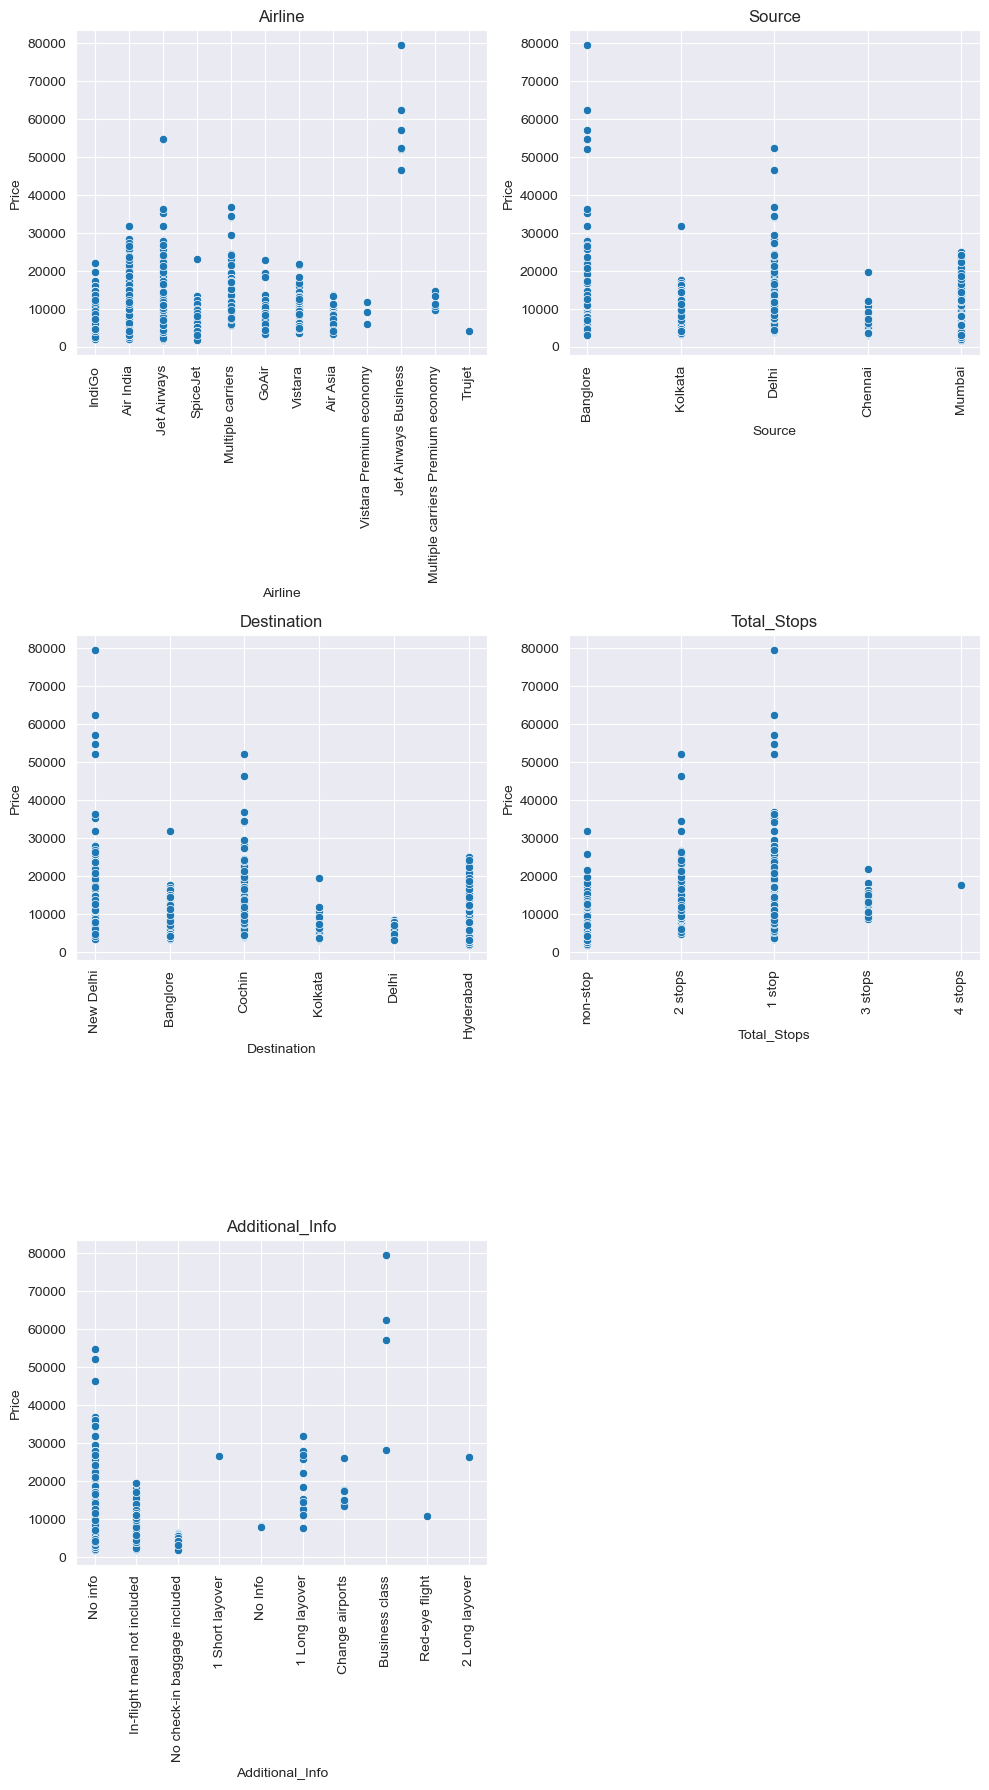

In [16]:
df_categorical_features = df_train.select_dtypes(include='object')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 18))
axes = axes.flatten()

for i, col in enumerate(df_categorical_features.columns):
    sns.scatterplot(x=df_train[col], y=df_train['Price'], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

if len(df_categorical_features.columns) < 6:
    for j in range(len(df_categorical_features.columns), 6):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Jet Airways Business has the higest price it is ranging between 40k to 80k
2. All the highcost flights departure is taking from bangalore
3. All the highcost flights landing in New_Delhi
4. The flights having 1 stop are charging high
5. If a flights is of business class its price is high

In [17]:
df_train.replace({'non-stop':0,'1 stop':1,'2 stops': 2,'3 stops':3,'4 stops':4},inplace=True)

In [18]:
df_train.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [19]:
#Since most of the additional info is no info we can drop the column
df_train.drop('Additional_Info', axis=1, inplace=True)

In [20]:
train_data = pd.get_dummies(df_train,drop_first = True)
train_data.shape

(10682, 31)

In [21]:
X = train_data.drop('Price',axis=1)
y = train_data['Price']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.6150661382595839
test_score =  0.6501290716854167


In [24]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.9684618991232898
test_score =  0.7492498594972563


In [25]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.9508220711679282
test_score =  0.8408490562303452


In [26]:
random_grid = {'n_estimators':[i for i in range(100,600,100)],
               'max_features':['auto','sqrt'],
               'max_depth':[i for i in range(1,30)],
               'min_samples_split':[2,5,10,15,100],
               'min_samples_leaf':[1,2,5,10]}

In [27]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [28]:
RF = RandomForestRegressor(n_estimators = 300,min_samples_split = 5,min_samples_leaf =1,max_features ='sqrt',max_depth = 23)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.9120569750411843
test_score =  0.8322681779551987


In [29]:
selection = ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)

[2.51758954e-01 1.42314745e-01 5.48948486e-02 0.00000000e+00
 2.42581392e-02 2.11984934e-02 2.80124899e-02 1.96722969e-02
 9.91642743e-02 1.71663780e-02 1.01464589e-02 1.84968012e-03
 1.72545894e-02 1.38161098e-01 6.67814907e-02 1.92387537e-02
 9.66423890e-04 3.20481459e-03 1.05565468e-04 5.39860119e-03
 7.82872437e-05 5.25327676e-04 1.41722592e-02 3.27773463e-03
 6.19595220e-03 5.96804063e-03 1.55555979e-02 7.55811081e-03
 5.60716116e-04 2.45598778e-02]


<Axes: >

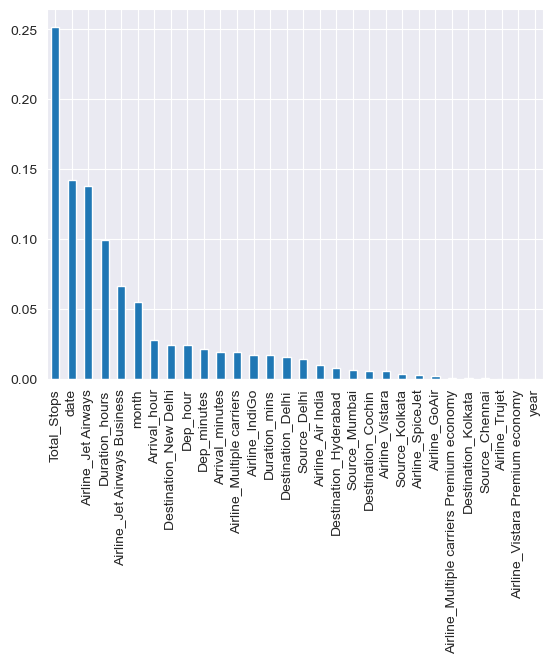

In [30]:
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [31]:
X_imp = X[feat_importances.nlargest(15).index]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 0)

In [32]:
rf_model = RandomizedSearchCV(estimator = selection,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [33]:
RF = ExtraTreesRegressor(n_estimators = 300,min_samples_split = 5,min_samples_leaf =1,max_features ='sqrt',max_depth = 23)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.9281474620227955
test_score =  0.7587435801348672


In [34]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.005881580545351595
test_score =  -0.0034990111875505825


In [35]:
df_test['date'] = pd.to_datetime(df_test.Date_of_Journey,format = "%d/%m/%Y").dt.day
df_test['month'] = pd.to_datetime(df_test.Date_of_Journey,format = "%d/%m/%Y").dt.month
df_test['year'] = pd.to_datetime(df_test.Date_of_Journey,format = "%d/%m/%Y").dt.year

df_test['Dep_hour'] = pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Dep_minutes'] = pd.to_datetime(df_test.Dep_Time).dt.minute

df_test['Arrival_hour'] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_minutes'] = pd.to_datetime(df_test.Arrival_Time).dt.minute

df_test.drop(['Arrival_Time', 'Dep_Time', 'Date_of_Journey'], axis=1, inplace=True)


duration = list(df_test['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())  !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

df_test['Duration_hours'] = duration_hours
df_test['Duration_mins'] = duration_mins

df_test.drop(['Duration', 'Route', 'Additional_Info'],axis=1,inplace=True)
df_test.replace({'non-stop':0,'1 stop':1,'2 stops': 2,'3 stops':3,'4 stops':4},inplace=True)
test_data = pd.get_dummies(df_test,drop_first = True)

In [36]:
test_data.head()

,Total_Stops,date,month,year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,2019,6,20,10,20,4,0,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,2019,19,15,19,0,23,45,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,2019,8,0,21,0,13,0,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,2019,23,55,2,45,2,50,...,False,False,False,False,False,False,True,False,False,False


In [37]:
test_data_final = test_data[X_imp.columns]
Predicted_price = pd.Series(RF.predict(test_data_final))

In [38]:
Predicted_price

0       11354.689556
1        4360.430556
2       13813.253898
3       11286.725667
4        4058.190278
            ...     
2666     9826.530278
2667     5219.884532
2668    14433.179611
2669    13912.159516
2670     7785.248250
Length: 2671, dtype: float64

In [39]:
df = pd.read_csv("Dataset/RFM Dataset/RFM data.csv")

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [42]:
last_day = df.InvoiceDate.max() + dt.timedelta(days = 1)

In [43]:
rfm_table = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (last_day - x.max()).days,
                                          "InvoiceNo": "nunique",
                                          "TotalPrice": "sum"})

rfm_table.rename(columns = {"InvoiceDate": "Recency",
                            "InvoiceNo": "Frequency",
                            "TotalPrice": "Monetary"}, inplace = True)

rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4060.40
12348.0,75,4,1437.24
12349.0,19,1,1417.60
12350.0,310,1,294.40
12352.0,36,7,1385.74


In [44]:
r_labels = range(5, 0, -1)
fm_labels = range(1, 6)

rfm_table["R"] = pd.qcut(rfm_table["Recency"], 5, labels = r_labels)
rfm_table["F"] = pd.qcut(rfm_table["Frequency"].rank(method = 'first'), 5, labels = fm_labels)
rfm_table["M"] = pd.qcut(rfm_table["Monetary"], 5, labels = fm_labels)

rfm_table.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,7,4060.40,5,5,5
12348.0,75,4,1437.24,2,4,4
12349.0,19,1,1417.60,4,1,4
12350.0,310,1,294.40,1,1,2
12352.0,36,7,1385.74,3,5,4


In [45]:
rfm_table["RFM_Segment"] = rfm_table["R"].astype(str) + rfm_table["F"].astype(str) + rfm_table["M"].astype(str)
rfm_table["RFM_Score"] = rfm_table[["R", "F", "M"]].sum(axis = 1)

rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15
12348.0,75,4,1437.24,2,4,4,244,10
12349.0,19,1,1417.60,4,1,4,414,9
12350.0,310,1,294.40,1,1,2,112,4
12352.0,36,7,1385.74,3,5,4,354,12


In [46]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm_table['Segment'] = rfm_table['R'].astype(str) + rfm_table['F'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(segt_map, regex=True)
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15,Champions
12348.0,75,4,1437.24,2,4,4,244,10,At-Risk
12349.0,19,1,1417.60,4,1,4,414,9,Promising
12350.0,310,1,294.40,1,1,2,112,4,Hibernating
12352.0,36,7,1385.74,3,5,4,354,12,Loyal Customers


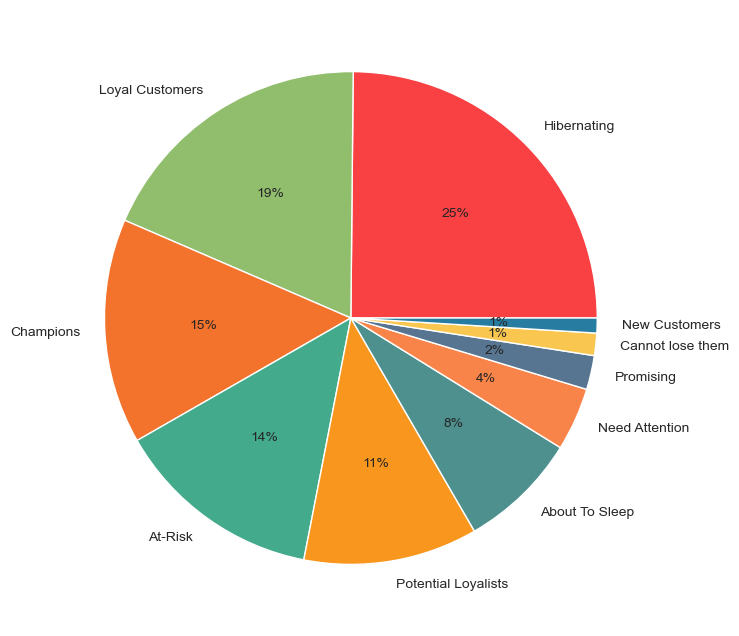

In [47]:
plt.figure(figsize=(10,8))
palette = ["#F94144", "#90BE6D", "#F3722C", "#43AA8B",  "#F8961E", "#4D908E", "#F9844A", "#577590", "#F9C74F", "#277DA1"]
plt.pie(rfm_table.Segment.value_counts(), labels=rfm_table.Segment.value_counts().index, autopct='%.0f%%', colors=palette)
plt.show()